## Cho dữ liệu poverty.txt
## Yêu cầu: Thực hiện linenear regression để từ Poverty Level => dự đoán Teen Birth Rate
1. Đọc dữ liệu, chuẩn hóa dữ liệu nếu cần. Trực quan hóa dữ liệu.
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được là 2 cột PovPct (inputs) và Brth15to17
(outputs) với tỷ lệ dữ liệu test là 0.2
3. Áp dụng linrear regression
4. Vẽ hình. Nhận xét kết quả
5. Nếu PovPct là 16 => Brth15to17 là bao nhiêu?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

## <span style='color:yellow'> 1. Đọc dữ liệu, chuẩn hóa dữ liệu nếu cần. Trực quan hóa dữ liệu.

In [3]:
poverty = pd.read_csv('Data/poverty.txt', sep = '\t')
poverty.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


In [4]:
poverty.shape

(51, 6)

In [5]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    51 non-null     object 
 1   PovPct      51 non-null     float64
 2   Brth15to17  51 non-null     float64
 3   Brth18to19  51 non-null     float64
 4   ViolCrime   51 non-null     float64
 5   TeenBrth    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [6]:
poverty.isnull().sum()

Location      0
PovPct        0
Brth15to17    0
Brth18to19    0
ViolCrime     0
TeenBrth      0
dtype: int64

In [8]:
poverty[['PovPct', 'Brth15to17']].corr()

,PovPct,Brth15to17
PovPct,1.000000,0.730293
Brth15to17,0.730293,1.000000


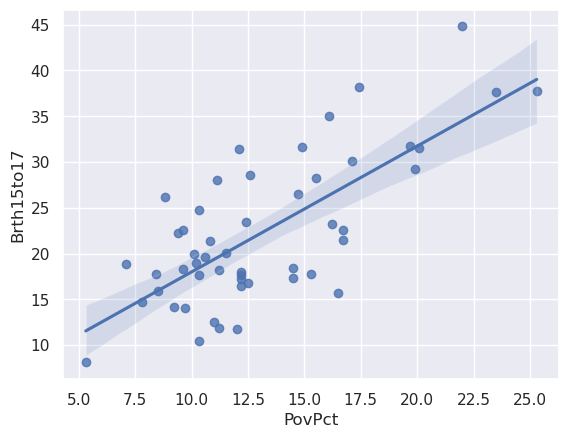

In [16]:
sbn.set_theme(style='darkgrid')
sbn.regplot(data=poverty, x='PovPct', y='Brth15to17')
plt.show()

## <span style='color:yellow'> 2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được là 2 cột PovPct (inputs) và Brth15to17 (outputs) với tỷ lệ dữ liệu test là 0.2
## <span style='color:yellow'> 3. Áp dụng linrear regression

### Linear regression

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(poverty[['PovPct']], poverty['Brth15to17'], test_size=0.2, random_state=1)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

R^2 score on whole set: 0.5330517786497637
R^2 score on train set: 0.5818322054371361
R^2 score on test set: 0.25220710506113275

MSE on test set: 34.505141806581655



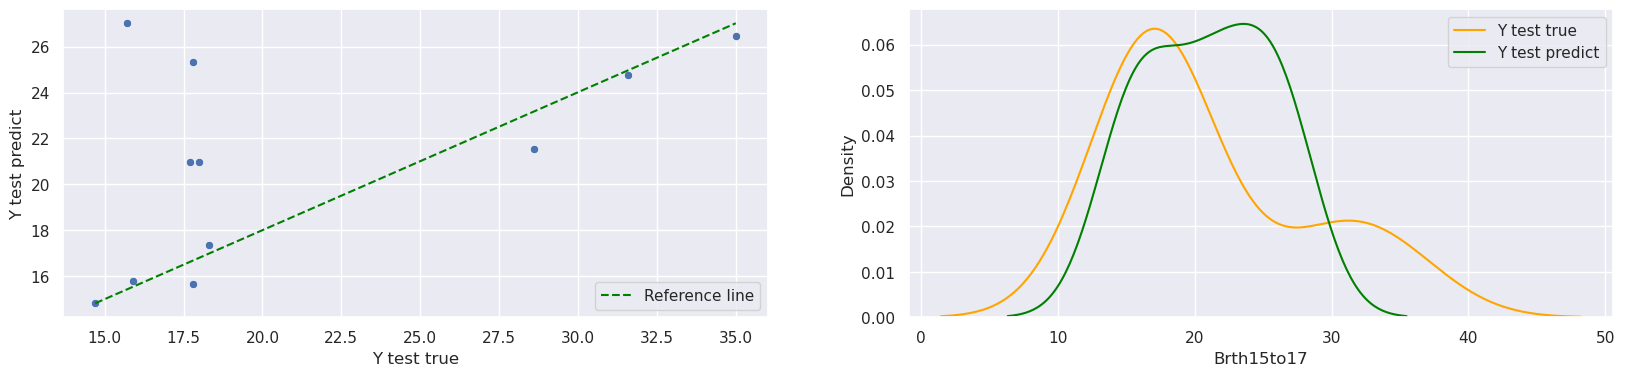

In [25]:
linreg = LinearRegression().fit(x_train, y_train)

y_pred_test = linreg.predict(x_test)

print(f'R^2 score on whole set: {linreg.score(poverty[['PovPct']], poverty['Brth15to17'])}')
print(f'R^2 score on train set: {linreg.score(x_train, y_train)}')
print(f'R^2 score on test set: {linreg.score(x_test, y_test)}')
print()
print(f'MSE on test set: {mean_squared_error(y_test, y_pred_test)}')
print()

plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
sbn.scatterplot(x=y_test, y=y_pred_test)
sbn.lineplot(x=[min(y_test), max(y_test)], y=[min(y_pred_test), max(y_pred_test)], linestyle='--', color='green', label='Reference line')
plt.xlabel('Y test true')
plt.ylabel('Y test predict')

plt.subplot(1,2,2)
sbn.kdeplot(y_test, label='Y test true', color='orange')
sbn.kdeplot(y_pred_test, label='Y test predict', color='green')
plt.legend()

plt.show()

+ Results are bad with accuracy too low on train set => underfitting

### Polynomial regression

R^2 score on whole set: 0.5413425022618326
R^2 score on train set: 0.591855099664218
R^2 score on test set: 0.2516393323035844

MSE on test set: 34.531340343162725



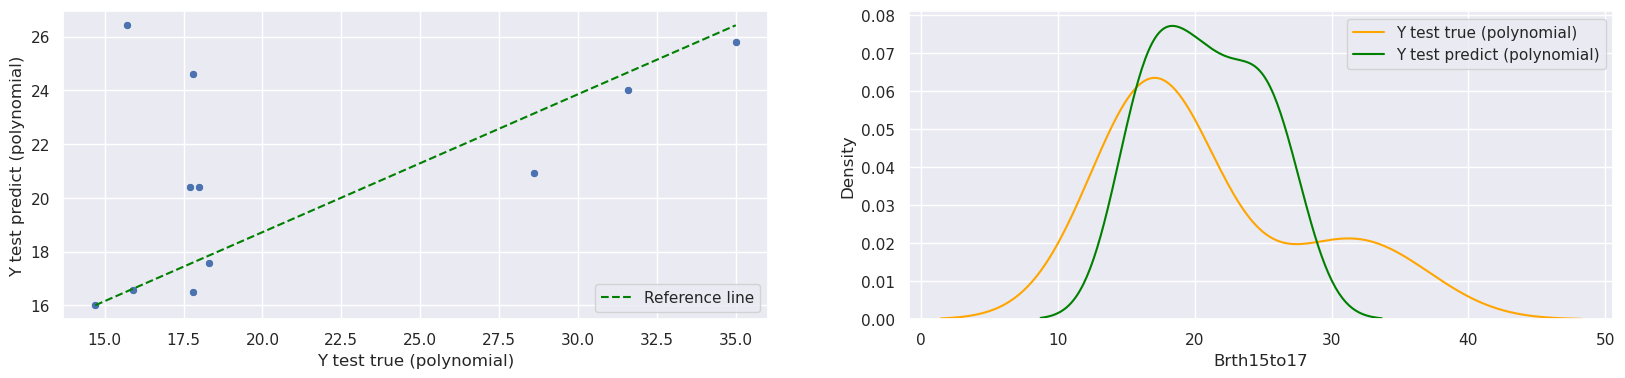

In [39]:
from sklearn.preprocessing import PolynomialFeatures

x_pf = PolynomialFeatures(degree=3).fit_transform(poverty[['PovPct']])
y = poverty['Brth15to17']

x_train_pf, x_test_pf, y_train_pf, y_test_pf = train_test_split(x_pf, y, test_size=0.2, random_state=1)

linreg_pf = LinearRegression().fit(x_train_pf, y_train_pf)

y_pred_test_pf = linreg_pf.predict(x_test_pf)

print(f'R^2 score on whole set: {linreg_pf.score(x_pf, y)}')
print(f'R^2 score on train set: {linreg_pf.score(x_train_pf, y_train_pf)}')
print(f'R^2 score on test set: {linreg_pf.score(x_test_pf, y_test_pf)}')
print()
print(f'MSE on test set: {mean_squared_error(y_test_pf, y_pred_test_pf)}')
print()

plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
sbn.scatterplot(x=y_test_pf, y=y_pred_test_pf)
sbn.lineplot(x=[min(y_test_pf), max(y_test_pf)], y=[min(y_pred_test_pf), max(y_pred_test_pf)], linestyle='--', color='green', label='Reference line')
plt.xlabel('Y test true (polynomial)')
plt.ylabel('Y test predict (polynomial)')

plt.subplot(1,2,2)
sbn.kdeplot(y_test_pf, label='Y test true (polynomial)', color='orange')
sbn.kdeplot(y_pred_test_pf, label='Y test predict (polynomial)', color='green')
plt.legend()

plt.show()

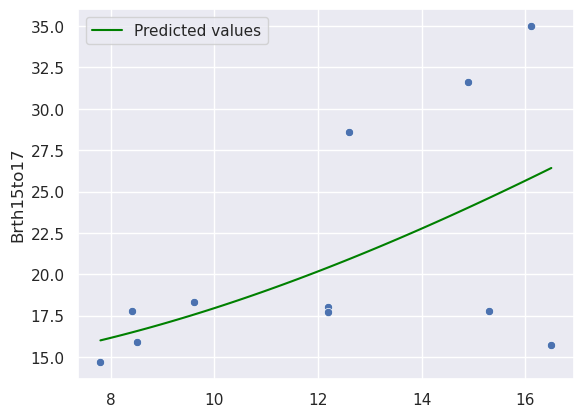

In [50]:
x_draw = np.linspace(min(x_test_pf[:,1]),max(x_test_pf[:,1]),60)
x_draw_pf = PolynomialFeatures(degree=3).fit_transform(x_draw.reshape(-1,1))

sbn.lineplot(x=x_draw, y=linreg_pf.predict(x_draw_pf), color='green', label='Predicted values')
sbn.scatterplot(x = x_test_pf[:,1], y = y_test_pf)
plt.show()

In [46]:
y_test_pf

22    18.0
2     35.0
49    15.9
26    17.8
33    28.6
44    17.8
30    14.7
50    17.7
32    15.7
27    18.3
3     31.6
Name: Brth15to17, dtype: float64